<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [22.3 The Euler Method](chapter22.03-The-Euler-Method.ipynb) | [Contents](Index.ipynb) | [22.5 Predictor-Corrector Methods](chapter22.05-Predictor-Corrector-Methods.ipynb) >

# Numerical Error and Instability

There are two main issues to consider with regard to integration schemes for ODEs: **accuracy** and **stability**. Accuracy refers to a scheme's ability to get close to the exact solution, which is usually unknown, as a function of the step size $h$. Previous chapters have referred to accuracy using the notation $O(h^p)$. The same notation translates to solving ODEs. The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable. Some integration schemes are stable for certain choices of $h$ and unstable for others; these integration schemes are also referred to as unstable.

To illustrate issues of stability, we numerically solve the pendulum equation using the Euler Explicit, Euler Implicit, and Trapezoidal Formulas.

**TRY IT!** Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval $[0,5]$ in increments of $0.1$ and for an initial solution of $S_0 = \left[\begin{array}{c} 1\\0 \end{array}\right]$. For the model parameters using $\sqrt{\frac{g}{l}} = 4$. Plot the approximate solution on a single graph

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

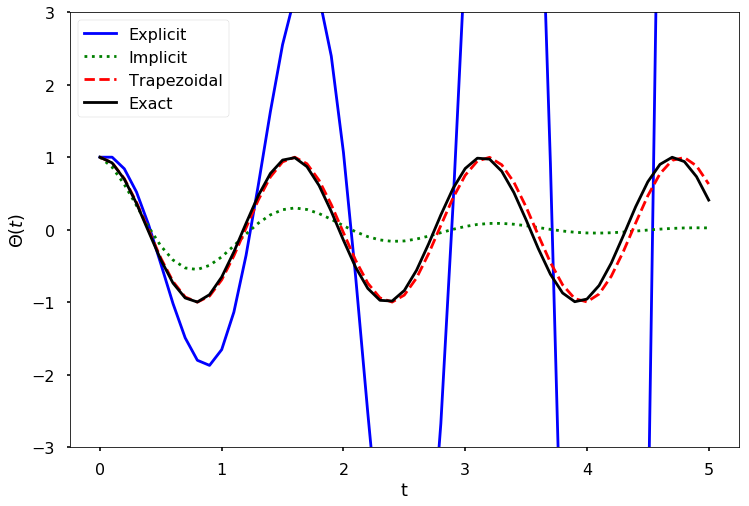

In [2]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

The generated figure above shows the comparisons of numerical solution to the pendulum problem. The exact solution is a pure cosine wave. The Explicit Euler scheme is clearly unstable. The Implicit Euler scheme decays exponentially, which is not correct. The Trapezoidal method captures the solution correctly, with a small phase shift as time increases.

<!--NAVIGATION-->
< [22.3 The Euler Method](chapter22.03-The-Euler-Method.ipynb) | [Contents](Index.ipynb) | [22.5 Predictor-Corrector Methods](chapter22.05-Predictor-Corrector-Methods.ipynb) >